In [1]:
# Libraries
import pandas as pd
import numpy as np

#visualization library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#warning library
import warnings
warnings.filterwarnings('ignore')

In [2]:
# getting the dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
# checking the dimension
df.shape

(1000, 40)

In [4]:
# checling entire dataset
df.head(4).T

,0,1,2,3
months_as_customer,328,228,134,256
age,48,42,29,41
policy_number,521585,342868,687698,227811
policy_bind_date,17-10-2014,27-06-2006,06-09-2000,25-05-1990
policy_state,OH,IN,OH,IL
policy_csl,250/500,250/500,100/300,250/500
policy_deductable,1000,2000,2000,2000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74
umbrella_limit,0,5000000,5000000,6000000
insured_zip,466132,468176,430632,608117


In [5]:
# checking the info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

We can observe that column _c39 has all null values, we can drop this column as it does not have any information. In total we get 39 columns including all features and label. Here the Label column will be fraud_reported and rest are featutres.

The Features consist of both categorical and Numerical columns, and Label is categorical column consist of two class. So our model will be a classification model where we need to predict if the fraud happens or not(Y/N).


In [6]:
df[# drop column _c39
df=df.drop('_c39', axis=1)

In [7]:
# let's chcek one more time if we have any null values
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

Data looks good with no null values, we are safe to proceed ahead.

In [8]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

we can see that our the classes of our label data seems imbalance. We need to deal with it before model building.

In [9]:
# statistical decription
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


from here we can observe that policy_number is merely an identification number alotted to the policy holder. The policy_deductable is of minimum 500 and maximum is of 2000.

Let's see what unique values are present in different columns of the dataset.

In [11]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

policy_number and incident_location are all unique values, rest values repeat itself. Noe let's separate categorical and numerical columns.

In [12]:
#Since categorical column has object datatype we will print all of the object data types and their unique values.

for column in df.columns:
    if df[column].dtype == object:    #checking datatype for each column if it is 'object'
        print(str(column) + ' : ' + str(df[column].unique()))   #unique() gives all the unique value of that column 
        print(df[column].value_counts())  # value_counts() count the number belongs to different class in that column
        print("\n _________________________________________________________________\n")

policy_bind_date : ['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '18-10-1995' '19-05-1993' '26-02-2005'
 '14-02-1990' '30-09-1993' '10-06-2014' '28-10-2008' '24-04-2007'
 '13-12-1993' '17-08-2011' '20-08-1990' '11-02-1994' '22-02-1994'
 '15-08-2011' '11-11-1998' '04-12-1995' '28-12-2002' '15-

We have property_damage and police_report_available with ? i.e. unknow values, we can replace this with third variable or we can simply consider them as No.

# EDA

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

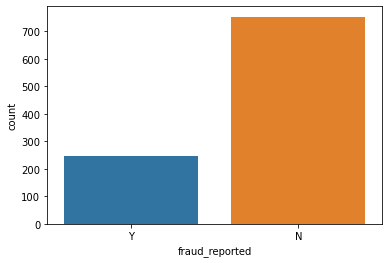

In [16]:
# visualize the label data.
sns.countplot('fraud_reported', data=df)

We can see the classes of fraud_reported are imbalance 

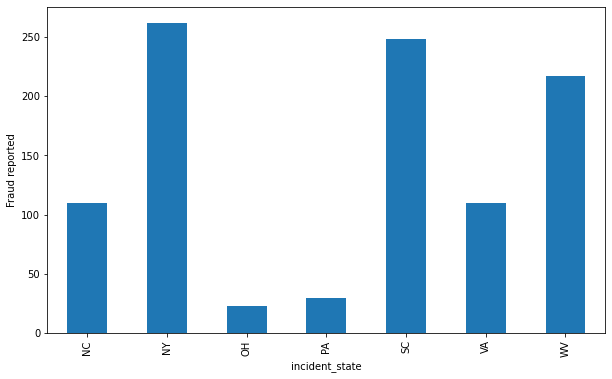

In [17]:
plt.figure(figsize=(10,6))
df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
plt.ylabel('Fraud reported')
plt.show()

we can see that maximum fraud_reported was reported in NY and least in OH

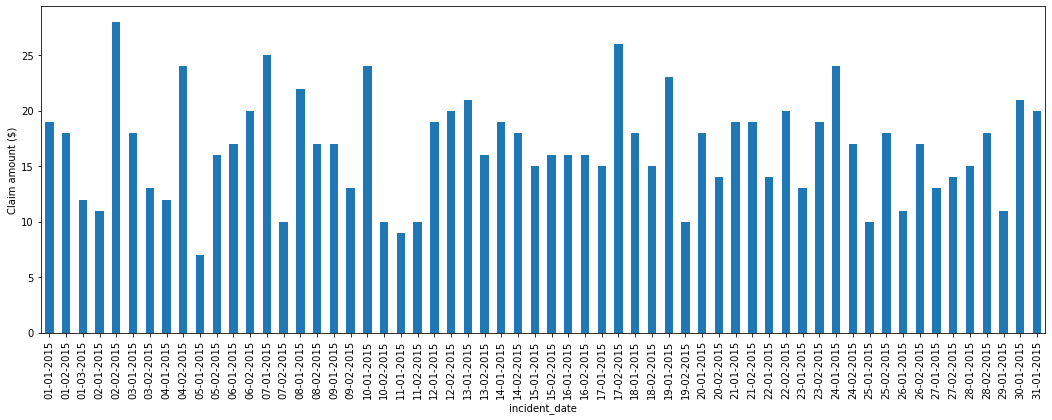

In [19]:
plt.figure(figsize=(18,6))
df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
plt.ylabel('Claim amount ($)')
plt.show()

maximum amount was claimed on 2-2-2015

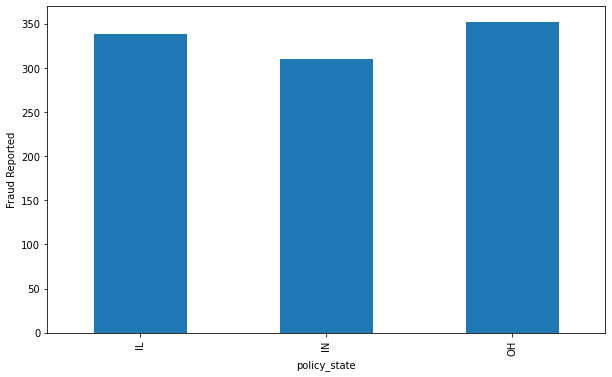

In [21]:
plt.figure(figsize=(10,6))
df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
plt.ylabel('Fraud Reported')
plt.show()

We can observe that OH registered max Fraud reported followed by IL and then IN

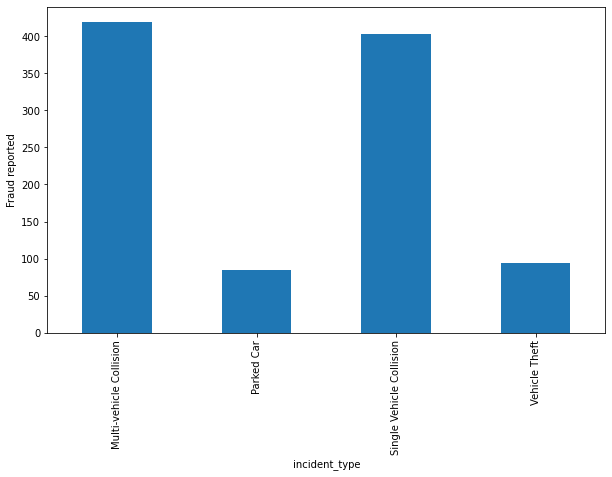

In [22]:
plt.figure(figsize=(10,6))
df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
plt.ylabel('Fraud reported')
plt.show()

We can see that maximum fraud reported are for Multi vehilcle Collision.

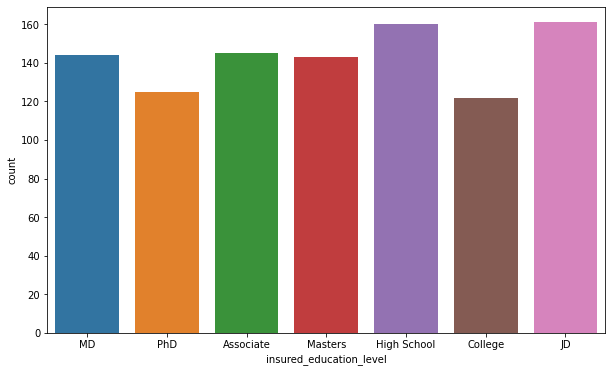

In [23]:
plt.figure(figsize=(10,6))
sns.countplot('insured_education_level', data=df)
plt.show()

We can observe insured person is mostly JD or Highschool 

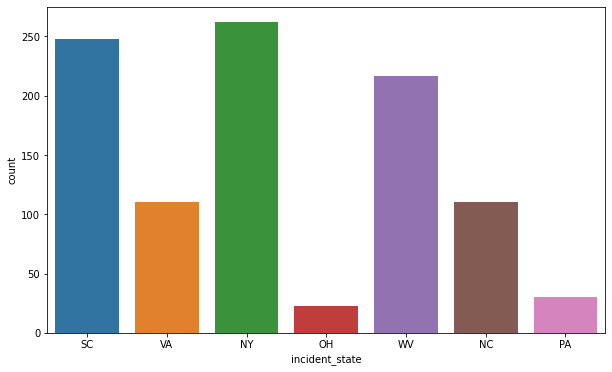

In [24]:
plt.figure(figsize=(10,6))
sns.countplot('incident_state', data=df)
plt.show()

NY seems we be the state which report highest incidents

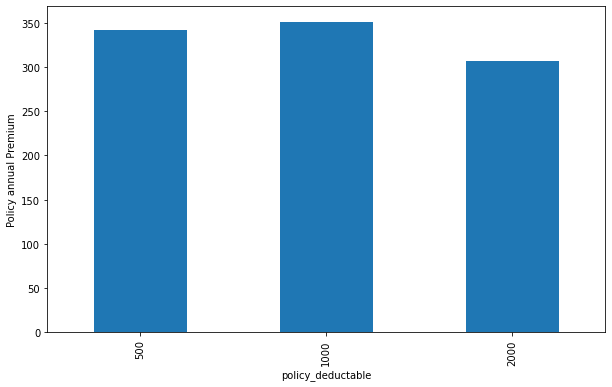

In [35]:
plt.figure(figsize=(10,6))
df.groupby('policy_deductable').policy_annual_premium .count().plot.bar(ylim=0)
plt.ylabel('Policy annual Premium')
plt.show()

Mostly policy deductable are of 1000 or 500 with respect to policy annual premium

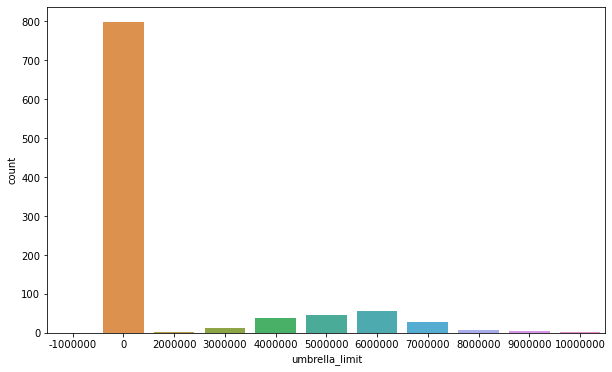

In [36]:
plt.figure(figsize=(10,6))
sns.countplot('umbrella_limit', data=df)
plt.show()

Most of insured person has zero umbrella limit, where as maximum amount under umeralla limit is 10000000

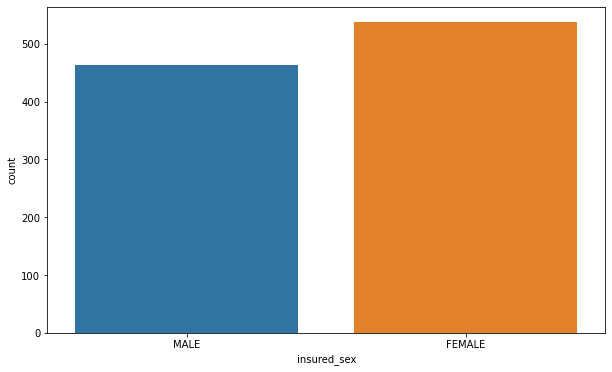

In [43]:
plt.figure(figsize=(10,6))
sns.countplot('insured_sex' ,data=df, )
plt.show()

We can observe that in the Insured sex distribution, the number of Female are higher than that of Male.

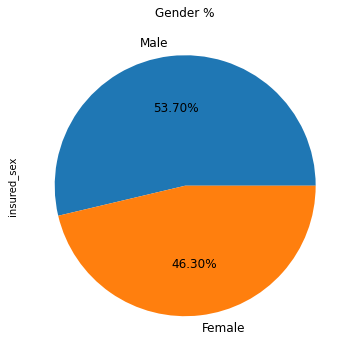

In [45]:
plt.figure(figsize=(10,6))
(df['insured_sex'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.2f%%', labels = ['Male', 'Female'], fontsize=12)
plt.title("Gender %")
plt.show()
                                                        

We tried to represent data in the form of pie graph, we can observe the %age of each gender distibuted in the form of pie.

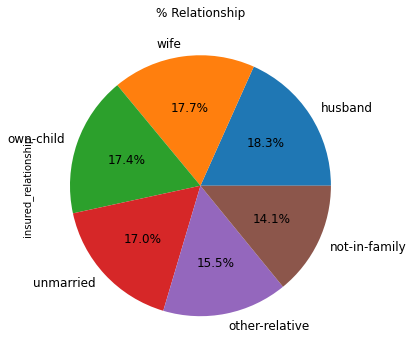

In [47]:
plt.figure(figsize=(10,6))
(df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12) 
plt.title("% Relationship")
plt.show()


autopct='%.1f%%',

We can observe how relationship data is distributed in the form of their %age overall.

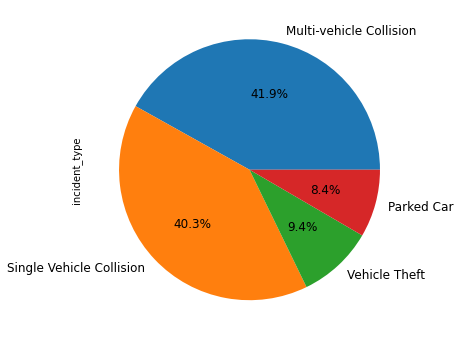

In [56]:
plt.figure(figsize=(10,6))
(df['incident_type'].value_counts()*100.0 /len(df)).plot.pie(fontsize=12,autopct='%.1f%%')
plt.show()

We can observe that more incident records are of Multi vehicle collision and Single vehicle collision , Insurance claims for Vehicle Theft and Parked car is comparitively very less.

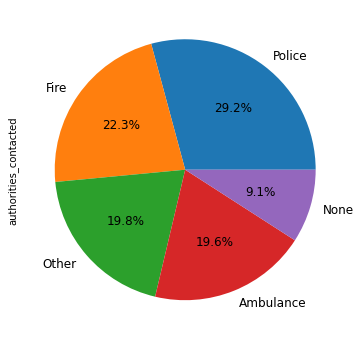

In [57]:
plt.figure(figsize=(10,6))
(df['authorities_contacted'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%',fontsize=12)
plt.show()

We can observe that in most of the cases the authority which is contacted are Police followed by fire

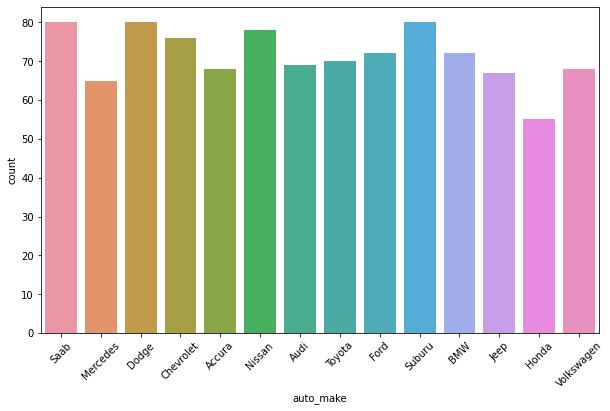

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(x='auto_make', data=df)
plt.xticks(rotation=45)
plt.show()

We can Observe that Saab, Dodge and Suburu are the auto make are highly involved in records

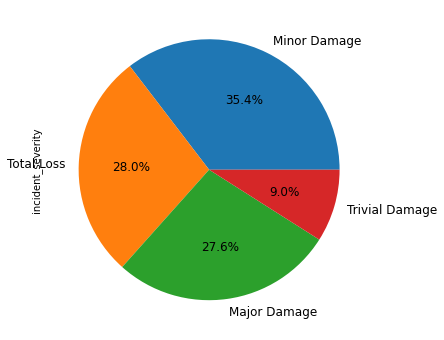

In [60]:
plt.figure(figsize=(10,6))
(df['incident_severity'].value_counts()*100/len(df)).plot.pie(autopct='%.1f%%',fontsize=12)
plt.show()

We cam clearly see the percentahge distribution of Incident serverity.

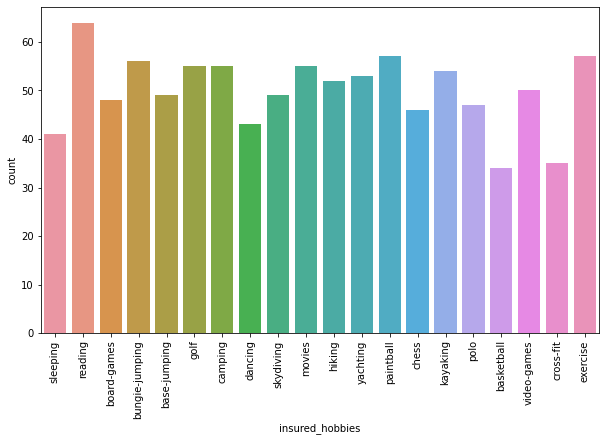

In [62]:
plt.figure(figsize=(10,6))
sns.countplot(x='insured_hobbies', data=df)
plt.xticks(rotation=90)
plt.show()

From above observation we can see the distibution of hobbies of the Insured person.

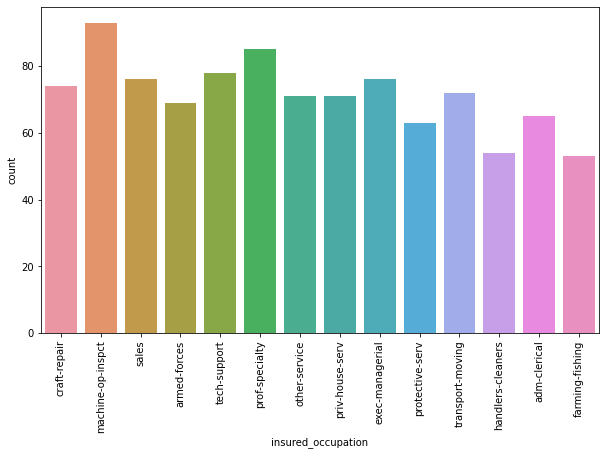

In [65]:
plt.figure(figsize=(10,6))
sns.countplot('insured_occupation', data=df)
plt.xticks(rotation=90)
plt.show()

From above observation we can see the distibution of Insured occupation, highest among them are machine-op-inspct.

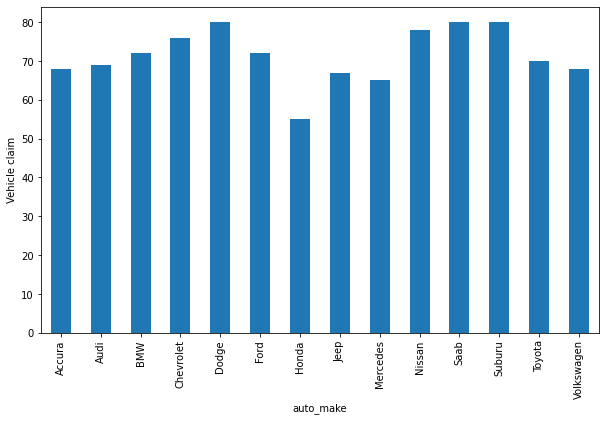

In [66]:
plt.figure(figsize=(10,6))
df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
plt.ylabel('Vehicle claim')
plt.xticks(rotation=90)
plt.show()

We are trying to see how vehicle claims are connected to auto make. And can observe that here as well DOdge, Saab and Suburu are the vehicle came for claims highly. We can see the list of other auto make in the plot

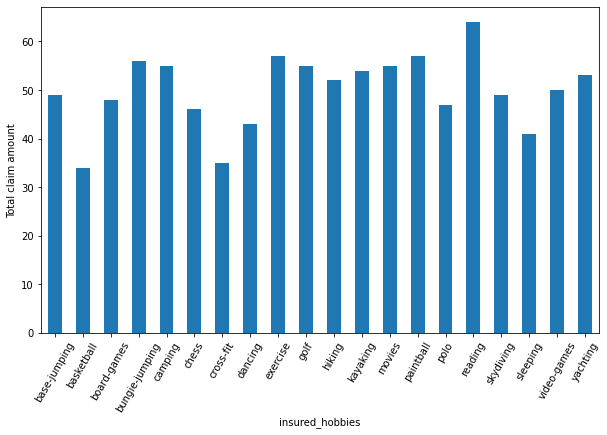

In [67]:
plt.figure(figsize=(10,6))
df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
plt.ylabel('Total claim amount')
plt.xticks(rotation=60)

plt.show()

From above observation we can see the relation of Total claim amount with respect to Insured_hobbies

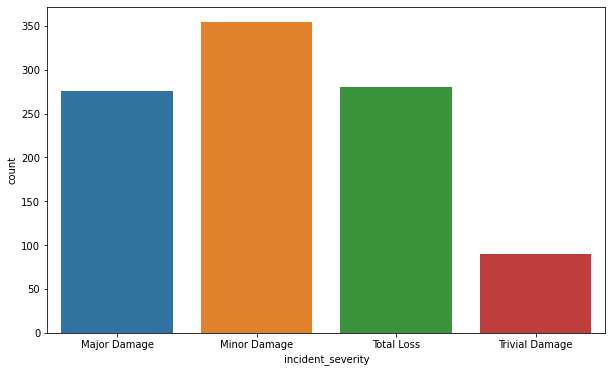

In [69]:
plt.figure(figsize=(10,6))
sns.countplot('incident_severity', data=df)
plt.show()

Most of the fraud reported are Minor damage

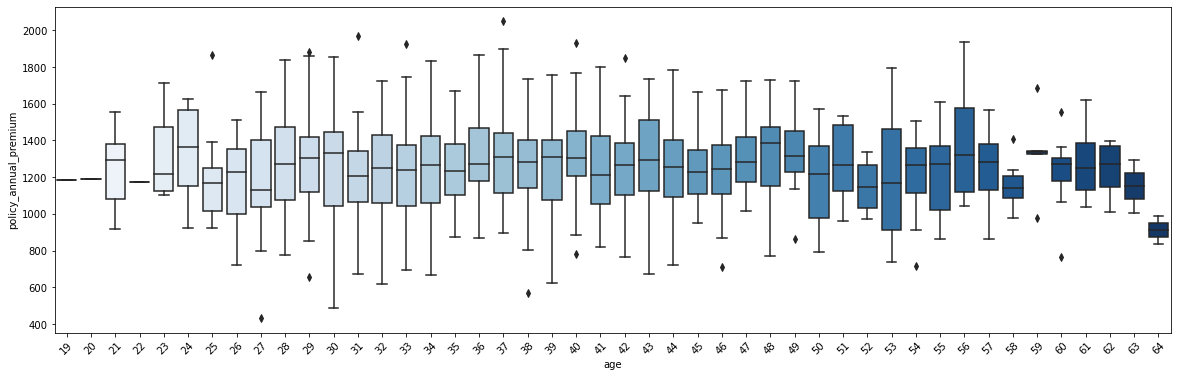

In [75]:
plt.figure(figsize=(20,6))
sns.boxplot(x="age", y="policy_annual_premium", data=df, palette = 'Blues')
plt.xticks(rotation=45)
plt.show()

We can observe that the Policy annual premium with respect to age don't show any uniformity, the mean value for premium amount for insured lies in same range for every age group

Text(0.5, 1.0, 'Umbrella limit for customers as per duration')

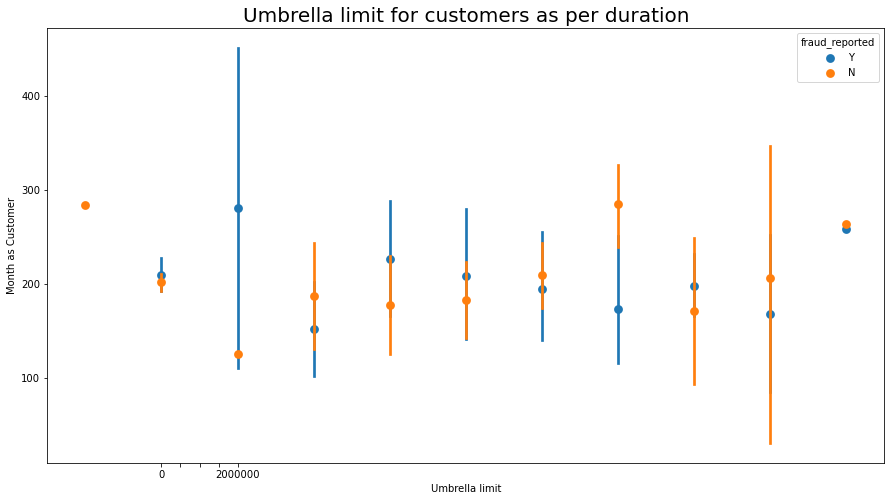

In [81]:
plt.figure(figsize=(15,8))
sns.pointplot(x='umbrella_limit',y='months_as_customer',data=df, hue='fraud_reported',join=False)
plt.xticks(np.linspace(1,2,5))
plt.ylabel('Month as Customer')
plt.xlabel('Umbrella limit')
plt.title("Umbrella limit for customers as per duration",{'fontsize':20})

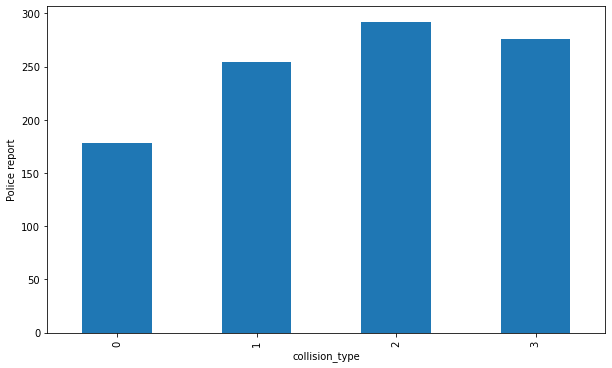

In [86]:
plt.figure(figsize=(10,6))
df.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
plt.ylabel('Police report')

plt.show()

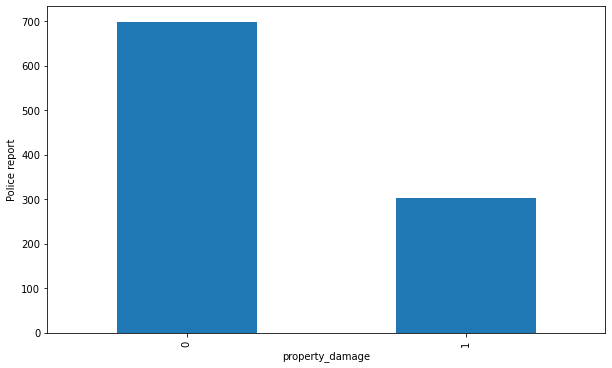

In [87]:
plt.figure(figsize=(10,6))
df.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
plt.ylabel('Police report')
plt.show()

From above two graph, in ncan first graph most of the multi vehicle collision are recorded in police report and in second graph we can observe that most of the cases of no property damage are recorded in the police report.


# Encoding and Data cleaning

In [83]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [84]:
# will use Label encoder to encode the values. except 'property_damage', 'police_report_available'
from sklearn.preprocessing import LabelEncoder
lab_enc= LabelEncoder()
df['policy_state']=lab_enc.fit_transform(df['policy_state'])
df['policy_csl']=lab_enc.fit_transform(df['policy_csl'])
df['insured_sex']=lab_enc.fit_transform(df['insured_sex'])
df['insured_education_level']=lab_enc.fit_transform(df['insured_education_level'])
df['insured_occupation']= lab_enc.fit_transform(df['insured_occupation'])
df['insured_hobbies']= lab_enc.fit_transform(df['insured_hobbies'])
df['insured_relationship']=lab_enc.fit_transform(df['insured_relationship'])
df['incident_type'] = lab_enc.fit_transform(df['incident_type'])                
df['collision_type'] = lab_enc.fit_transform(df['collision_type'])               
df['incident_severity'] =lab_enc.fit_transform(df['incident_severity'])
df['authorities_contacted'] =lab_enc.fit_transform(df['authorities_contacted'])
df['incident_state'] = lab_enc.fit_transform(df['incident_state'])                  
df['incident_city'] = lab_enc.fit_transform(df['incident_city'])                   
df['incident_location']=lab_enc.fit_transform(df['incident_location'])    
df['auto_make'] = lab_enc.fit_transform(df['auto_make'])                     
df['auto_model']= lab_enc.fit_transform(df['auto_model'])
df['fraud_reported']=lab_enc.fit_transform(df['fraud_reported'])

In [85]:

df['property_damage'].replace(to_replace='YES', value=1, inplace=True)
df['property_damage'].replace(to_replace='NO', value=0, inplace=True)
df['property_damage'].replace(to_replace='?', value=0, inplace=True)
df['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
df['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
df['police_report_available'].replace(to_replace='?', value=0, inplace=True)

df.head(5).T 

,0,1,2,3,4
months_as_customer,328,228,134,256,228
age,48,42,29,41,44
policy_number,521585,342868,687698,227811,367455
policy_bind_date,17-10-2014,27-06-2006,06-09-2000,25-05-1990,06-06-2014
policy_state,2,1,2,0,0
policy_csl,1,1,0,1,2
policy_deductable,1000,2000,2000,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0,5000000,5000000,6000000,6000000
insured_zip,466132,468176,430632,608117,610706


Some variables such as 'policy_bind_date', 'incident_date', 'incident_location' and 'insured_zip' contain very high number of level. We will remove these columns for our purposes. We can also remove policy_number as it is merely an identification number for our Model building purpose. Also incident_location don't seems to be that import to me.

auto_year is the year when the vehicle was made, it is an important information for premimum and insurance purpose, so we will make this information useful by changing it to vehicle_age

In [88]:
# using auto_year to calculate vehicle_age
df['vehicle_age'] = 2022 - df['auto_year'] # Deriving the age of the vehicle based on the year value 
df['vehicle_age'].head(10)

0    18
1    15
2    15
3     8
4    13
5    19
6    10
7     7
8    10
9    26
Name: vehicle_age, dtype: int64

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

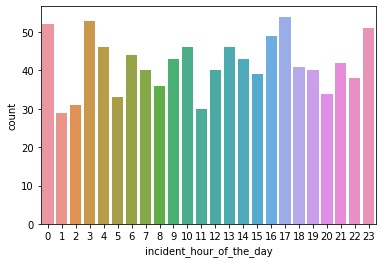

In [89]:
sns.countplot('incident_hour_of_the_day',data=df)

We can observe that this information is distributed in 24 hrs category. It seems like we cannot check skewness in this as well cause it will hampered the data.

In [90]:
# dropping the Unwanted Columns
df1=df.drop(columns=['policy_number','policy_bind_date', 'incident_date', 'incident_location',
                     'insured_zip','incident_location','auto_year'], axis=1)
df1.head().T

,0,1,2,3,4
months_as_customer,328.00,228.00,134.00,256.00,228.00
age,48.00,42.00,29.00,41.00,44.00
policy_state,2.00,1.00,2.00,0.00,0.00
policy_csl,1.00,1.00,0.00,1.00,2.00
policy_deductable,1000.00,2000.00,2000.00,2000.00,1000.00
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0.00,5000000.00,5000000.00,6000000.00,6000000.00
insured_sex,1.00,1.00,0.00,0.00,1.00
insured_education_level,4.00,4.00,6.00,6.00,0.00
insured_occupation,2.00,6.00,11.00,1.00,11.00


Data looks good now, let's move ahead and check for skewness , before that let us check the correlation matrix

In [91]:
# checking dimension of data set
df1.shape


(1000, 34)

In [93]:
df1.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.060925,-0.000833,0.009814,...,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,0.020544,0.000292
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.073337,0.000969,0.017220,...,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.012143,-0.001354
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,-0.020481,-0.034327,-0.031215,...,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.029432,-0.002114
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,-0.010757,0.009153,0.015788,...,0.071500,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.037190,0.033082
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,-0.009733,0.015217,-0.046733,...,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.014817,-0.026105
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.038853,-0.019715,0.035922,...,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.014480,0.049226
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.010688,-0.019357,0.023422,...,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.058622,-0.009893
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,1.000000,0.009002,-0.006160,...,0.042463,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,0.030873,0.028247
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.009002,1.000000,-0.020298,...,0.019211,0.051640,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.008808,-0.043509
insured_occupation,0.009814,0.017220,-0.031215,0.015788,-0.046733,0.035922,0.023422,-0.006160,-0.020298,1.000000,...,-0.014794,-0.025232,0.003692,0.020211,0.003004,-0.000829,0.042621,0.020584,0.001564,0.006676


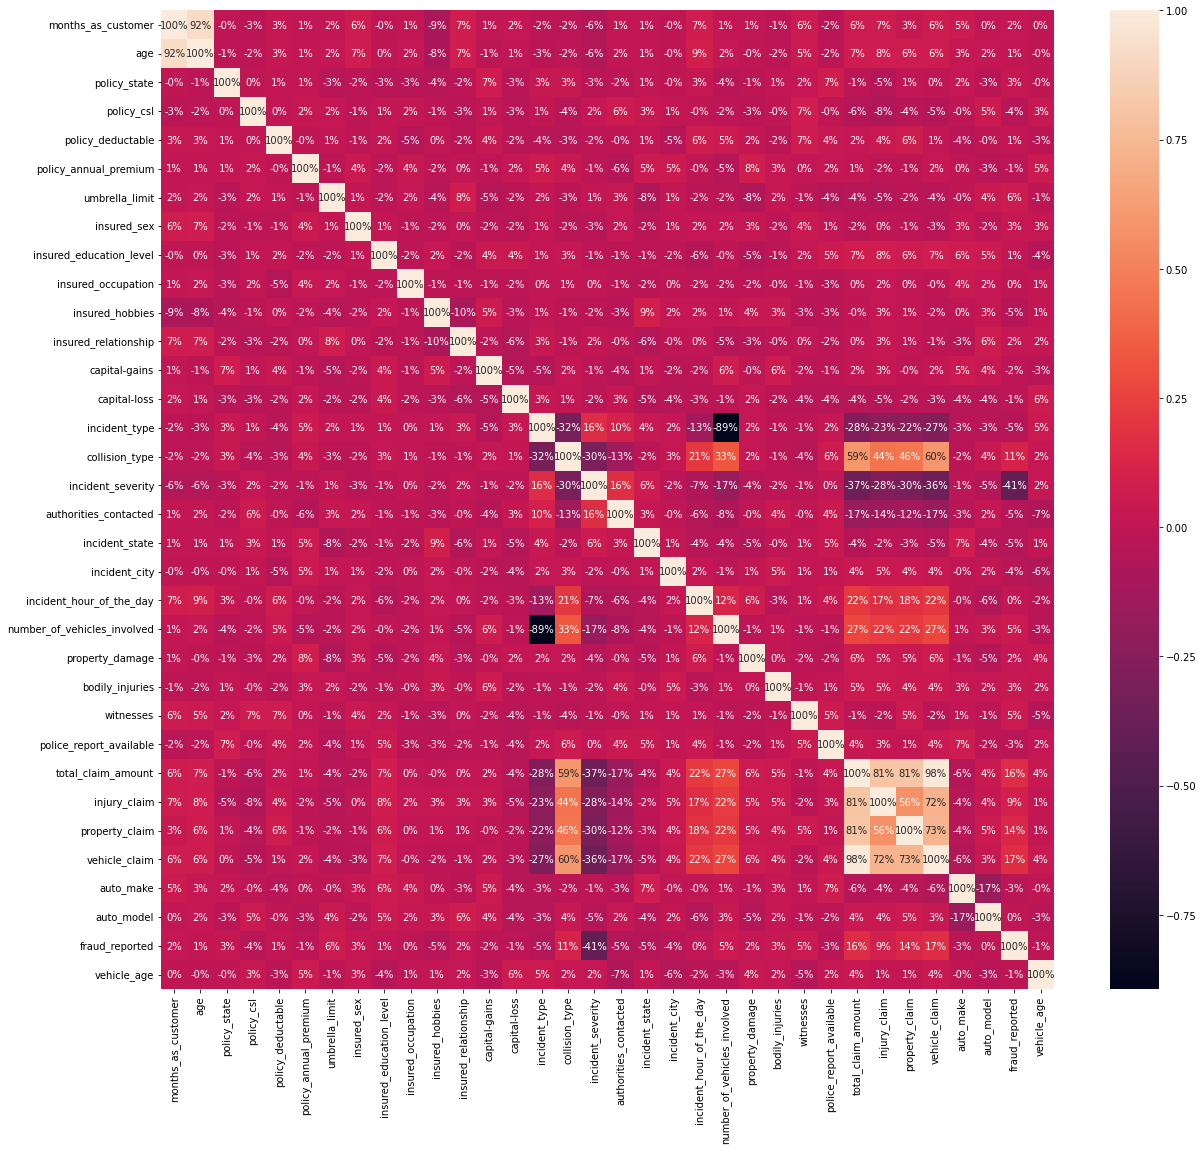

In [94]:
# let's visulaize the correlation matrix , using Heatmap
plt.figure(figsize=(20,18))
sns.heatmap(df1.corr(), annot= True, fmt='.0%')
plt.show()

From above observation we can see that fraud reported are highly correlated withn  incident serverity, and least correlated with insured_occupation, incident_hour_of_the_day, and auto_model. we can simply drop them, or let's do selectK Best , to select all the important features of the model.

# Skewness and Outlier detection and removal

In [92]:
# chceking for data skewness
df1.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636


Considering the threshold value of +/-0.50 whatever skewness is observed is in categorical data or label, and we don't consider them both for skewness transformation techniques, so let's move ahead with this data itself.

# Now lets use SelectKbest feature selection method



# SelectKBest use f_classif function to find best feature, where, f_classif uses ANOVA test

In [95]:
from sklearn.feature_selection import SelectKBest, f_classif

In [96]:
# separting features and label
X= df1.drop('fraud_reported', axis=1)
y=df1.fraud_reported

In [97]:
best_features= SelectKBest(score_func=f_classif, k=30)
fit= best_features.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)

#concatenate dataframes
feature_scores=pd.concat([df_columns, df_scores], axis=1)

feature_scores.columns=['Feature_Name', 'Score']  # name output columns

print(feature_scores.nlargest(30, 'Score'))   #print best 30 features

                   Feature_Name       Score
16            incident_severity  196.960603
29                vehicle_claim   29.718214
26           total_claim_amount   27.463776
28               property_claim   19.327729
15               collision_type   12.252860
27                 injury_claim    8.328776
6                umbrella_limit    3.441452
21  number_of_vehicles_involved    2.689100
18               incident_state    2.644427
14                incident_type    2.539153
24                    witnesses    2.451026
10              insured_hobbies    2.194239
17        authorities_contacted    2.098018
19                incident_city    1.631761
3                    policy_csl    1.382236
23              bodily_injuries    1.146656
7                   insured_sex    0.952144
2                  policy_state    0.865237
25      police_report_available    0.770117
30                    auto_make    0.756354
11         insured_relationship    0.442135
0            months_as_customer 

This is the list of Best 30 features which we will be using in our Model Building

In [99]:
X_new= df1[['incident_severity','vehicle_claim','total_claim_amount','property_claim',
            'collision_type','injury_claim','umbrella_limit','number_of_vehicles_involved',
            'incident_state','incident_type','witnesses','insured_hobbies','authorities_contacted',
            'incident_city','policy_csl','bodily_injuries','insured_sex','policy_state',
            'police_report_available','auto_make','insured_relationship','months_as_customer',
            'capital-gains','property_damage','capital-loss','policy_deductable','policy_annual_premium' ,
            'age','insured_education_level','vehicle_age']]    

In [103]:
X_new.head().T

,0,1,2,3,4
incident_severity,0.00,1.00,1.00,0.00,1.00
vehicle_claim,52080.00,3510.00,23100.00,50720.00,4550.00
total_claim_amount,71610.00,5070.00,34650.00,63400.00,6500.00
property_claim,13020.00,780.00,3850.00,6340.00,650.00
collision_type,3.00,0.00,2.00,1.00,0.00
injury_claim,6510.00,780.00,7700.00,6340.00,1300.00
umbrella_limit,0.00,5000000.00,5000000.00,6000000.00,6000000.00
number_of_vehicles_involved,1.00,1.00,3.00,1.00,1.00
incident_state,4.00,5.00,1.00,2.00,1.00
incident_type,2.00,3.00,0.00,2.00,3.00


#  Scaling

In [101]:
from sklearn.preprocessing import StandardScaler

# Scaling the data using StandardScaler.
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X_new)

In [106]:
X_scaled.shape

(1000, 30)

# Model Building

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# spliting data into train and test set, keeping 25% of data as test
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y, test_size=0.25)

# Logistic Regression

In [109]:
from sklearn.metrics import confusion_matrix

# Model
LR=LogisticRegression()
maxAccu=0   # maximum accuracy
maxRS=0    #best random state value for which max accuracy is achieved

for i in range(1,200):
    X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.25, random_state=i)
    LR.fit(X_train,y_train)   #fitting the data will train your model
    Y_pred=LR.predict(X_test)    # this is predicted target variable
    acc= accuracy_score(y_test,Y_pred)   # accuracy score
    print('Accuracy ', acc, 'Random state ', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print("Max accuracy ", maxAccu, " at random state ", i)

print("Best accuracy is ", maxAccu, "at random state ", maxRS)  


Accuracy  0.752 Random state  1
Max accuracy  0.752  at random state  1
Accuracy  0.772 Random state  2
Max accuracy  0.772  at random state  2
Accuracy  0.784 Random state  3
Max accuracy  0.784  at random state  3
Accuracy  0.736 Random state  4
Accuracy  0.756 Random state  5
Accuracy  0.796 Random state  6
Max accuracy  0.796  at random state  6
Accuracy  0.768 Random state  7
Accuracy  0.752 Random state  8
Accuracy  0.776 Random state  9
Accuracy  0.776 Random state  10
Accuracy  0.728 Random state  11
Accuracy  0.748 Random state  12
Accuracy  0.792 Random state  13
Accuracy  0.768 Random state  14
Accuracy  0.772 Random state  15
Accuracy  0.804 Random state  16
Max accuracy  0.804  at random state  16
Accuracy  0.784 Random state  17
Accuracy  0.8 Random state  18
Accuracy  0.772 Random state  19
Accuracy  0.804 Random state  20
Accuracy  0.7 Random state  21
Accuracy  0.772 Random state  22
Accuracy  0.708 Random state  23
Accuracy  0.752 Random state  24
Accuracy  0.724 Rand

Best accuracy is  0.824 at random state  122, so we will take 122 as random state to get best accuracy

In [110]:
# creating train test split for best random state
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.25, random_state=122)

pred=LR.predict(X_train)
LR_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {LR_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=LR.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")


=====================Train Result========================
Accuracy Score : 78.40%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                     0           1  accuracy   macro avg  weighted avg
precision    0.810345    0.633929     0.784    0.722137      0.765182
recall       0.926523    0.369792     0.784    0.648157      0.784000
f1-score     0.864548    0.467105     0.784    0.665827      0.762803
support    558.000000  192.000000     0.784  750.000000    750.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[517  41]
 [121  71]]

=====================Test Result========================
Accuracy Score : 82.0%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                     0          1  accuracy   macro avg  weighted avg
precision    0.864078   0.613636      0.82    0.738857      0.808981
recall       0.912821   0.490909      0.82    0.701865      0

In [113]:
# Cross Validation

from sklearn.model_selection import cross_val_score

# validating accuracy
scr= cross_val_score(LR, X, y, cv=10)
print("Cross Validation Score For Logistic Regression model : ", scr.mean())

Cross Validation Score For Logistic Regression model :  0.7469999999999999


We can see that accuracy is fine, but our target variable is imbalanced let's see how other models are performing, if needed we will balance our dataset using SMOTE.

In [112]:
from collections import Counter
Counter(y_train)    # count the sample data.

Counter({1: 192, 0: 558})

We can clearly observe that the label classes are highly imbalance 25-75 ratio, we can still apply decision tree here, as this much imbalance does not make major impact on Decision tree Model.




# Decision Tree Classifier

In [114]:
from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier()
DTC.fit(X_train,y_train)
pred=DTC.predict(X_train)
DTC_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {DTC_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=DTC.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")


=====================Train Result========================
Accuracy Score : 100.00%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    558.0  192.0       1.0      750.0         750.0


-----------------------------------------------------------
Confusion Matrix : 
 [[558   0]
 [  0 192]]

=====================Test Result========================
Accuracy Score : 77.2%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                     0          1  accuracy   macro avg  weighted avg
precision    0.867021   0.483871     0.772    0.675446      0.782728
recall       0.835897   0.545455     0.772    0.690676      0.772000
f1-score     0.851175   0.512821     0.772    

In [115]:
# Cross validation 

scr= cross_val_score(DTC,X,y, cv=10 )
print("Cross Validation score for DecisionTreeClassifier : ", scr.mean())

Cross Validation score for DecisionTreeClassifier :  0.761


 # Ensemble Technique

In [116]:
from sklearn.ensemble import RandomForestClassifier

#Model
RF= RandomForestClassifier()

#Fit
RF.fit(X_train,y_train)
pred=RF.predict(X_train)
RF_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {RF_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=RF.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")


=====================Train Result========================
Accuracy Score : 100.00%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    558.0  192.0       1.0      750.0         750.0


-----------------------------------------------------------
Confusion Matrix : 
 [[558   0]
 [  0 192]]

=====================Test Result========================
Accuracy Score : 77.60000000000001%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                     0          1  accuracy   macro avg  weighted avg
precision    0.829384   0.487179     0.776    0.658282      0.754099
recall       0.897436   0.345455     0.776    0.621445      0.776000
f1-score     0.862069   0.404255 

In [117]:
# Cross Validation

scr= cross_val_score(RF,X,y,cv=10)
print("Cross validation Score of RandomForestClassifier model is : ", scr.mean())

Cross validation Score of RandomForestClassifier model is :  0.759


# SVC

In [118]:
from sklearn.svm import SVC

# Model
svc=SVC()

#Fit
svc.fit(X_train,y_train)
pred=svc.predict(X_train)
svc_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {svc_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=svc.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")



=====================Train Result========================
Accuracy Score : 87.47%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                     0           1  accuracy   macro avg  weighted avg
precision    0.856923    0.990000  0.874667    0.923462      0.890991
recall       0.998208    0.515625  0.874667    0.756916      0.874667
f1-score     0.922185    0.678082  0.874667    0.800134      0.859695
support    558.000000  192.000000  0.874667  750.000000    750.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[557   1]
 [ 93  99]]

=====================Test Result========================
Accuracy Score : 76.0%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                     0          1  accuracy  macro avg  weighted avg
precision    0.789700   0.352941      0.76    0.57132      0.693613
recall       0.943590   0.109091      0.76    0.52634      0.76

In [119]:
# checking for f1 score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.16666666666666669

We can see that the f1 score is very low here, it means it is not correctly predicting our minority class (1) here, so we need to balance our training dataset, in order to train our model. It will in return help us to build a better model and get a better f1 score

In [120]:
# Balancing the label classes using SMOTE 

from imblearn.over_sampling import SMOTE

ove_smp= SMOTE(0.75)
X_train_ns, y_train_ns=ove_smp.fit_resample(X_train,y_train)

print("The number of classes before fit {}". format((Counter(y_train))))
print("The numberbof classes aftere fit {}".format((Counter(y_train_ns))))

The number of classes before fit Counter({0: 558, 1: 192})
The numberbof classes aftere fit Counter({0: 558, 1: 418})


In [121]:
# Training using balanced label dataset
svc.fit(X_train_ns,y_train_ns)
pred=svc.predict(X_train_ns)
svc_clf_report= pd.DataFrame(classification_report(y_train_ns, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train_ns, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {svc_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train_ns, pred)}\n")


# Test score

y_pred=svc.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")




=====================Train Result========================
Accuracy Score : 94.26%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                     0           1  accuracy   macro avg  weighted avg
precision    0.941901    0.943627  0.942623    0.942764      0.942641
recall       0.958781    0.921053  0.942623    0.939917      0.942623
f1-score     0.950266    0.932203  0.942623    0.941235      0.942530
support    558.000000  418.000000  0.942623  976.000000    976.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[535  23]
 [ 33 385]]

=====================Test Result========================
Accuracy Score : 72.8%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                     0          1  accuracy   macro avg  weighted avg
precision    0.839572   0.396825     0.728    0.618199      0.742168
recall       0.805128   0.454545     0.728    0.629837      0

In [123]:
# Cross Validation
scr= cross_val_score(svc,X,y,cv=10)
print("Cross validation Score of SVC is : ", scr.mean())

Cross validation Score of SVC is :  0.7529999999999999


From here we can observe that our cross validation score improves so as our f1 score increases, this means initially the SVC Model was not predicting our minority class , 1 in our case  properly 

# Gradient Boosting Classifier

In [122]:
from sklearn.ensemble import GradientBoostingClassifier

#Model
gbdt_clf =GradientBoostingClassifier()

#Fit 
gbdt_clf.fit(X_train_ns, y_train_ns)
pred= gbdt_clf.predict(X_train_ns)

gbdt_clf_report= pd.DataFrame(classification_report(y_train_ns, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train_ns, pred)*100:.2f}%")
print("\n")
print(f"CLASSIFICATION REPORT :\n {gbdt_clf_report}")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train_ns, pred)}\n")

#Test score

pred=gbdt_clf.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, pred, output_dict=True))

print("=====================Test Result========================")

print(f"Accuracy Score : {accuracy_score(y_test, pred)*100:.2f}%")
print("\n")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, pred)}\n")


      


=====================Train Result========================
Accuracy Score : 96.41%


CLASSIFICATION REPORT :
                     0           1  accuracy   macro avg  weighted avg
precision    0.967800    0.959233  0.964139    0.963516      0.964131
recall       0.969534    0.956938  0.964139    0.963236      0.964139
f1-score     0.968666    0.958084  0.964139    0.963375      0.964134
support    558.000000  418.000000  0.964139  976.000000    976.000000
-----------------------------------------------------------
Confusion Matrix : 
 [[541  17]
 [ 18 400]]

=====================Test Result========================
Accuracy Score : 82.00%


CLASSIFICATION REPORT :
                     0          1  accuracy   macro avg  weighted avg
precision    0.916667   0.571429      0.82    0.744048      0.840714
recall       0.846154   0.727273      0.82    0.786713      0.820000
f1-score     0.880000   0.640000      0.82    0.760000      0.827200
support    195.000000  55.000000      0.82  250.0000

In [124]:
scr= cross_val_score(gbdt_clf,X,y,cv=10)
print("Cross validation Score of GradientBoostingClassifier model is : ", scr.mean())

Cross validation Score of GradientBoostingClassifier model is :  0.8109999999999999


# Once again trained LR model with balanced dataset

In [125]:
LR.fit(X_train_ns,y_train_ns)
pred=LR.predict(X_train_ns)
LR_clf_report= pd.DataFrame(classification_report(y_train_ns, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train_ns, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {LR_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train_ns, pred)}\n")


# Test score

y_pred=LR.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")


=====================Train Result========================
Accuracy Score : 75.31%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                     0           1  accuracy   macro avg  weighted avg
precision    0.780531    0.715328  0.753074    0.747930      0.752606
recall       0.790323    0.703349  0.753074    0.746836      0.753074
f1-score     0.785396    0.709288  0.753074    0.747342      0.752801
support    558.000000  418.000000  0.753074  976.000000    976.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[441 117]
 [124 294]]

=====================Test Result========================
Accuracy Score : 74.4%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                     0          1  accuracy   macro avg  weighted avg
precision    0.917197   0.451613     0.744    0.684405      0.814769
recall       0.738462   0.763636     0.744    0.751049      0

We can observe that f1 score definitely increases

Moving ahead, we need to decide on best Model, Will use auc_roc curve to decide it


# Let's plot AUC ROC Curve to decide best Model

In [126]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_roc_curve

In [127]:
LR= LogisticRegression()
DTC = DecisionTreeClassifier()
RF = RandomForestClassifier()
gbdt_clf= GradientBoostingClassifier()
svc= SVC()

In [129]:
#  Train test split

x= X_new
y=df['fraud_reported']
x_train,x_test,Y_train,Y_test=train_test_split(x,y, test_size=0.25, random_state=41)

# Training with all classifier
LR.fit(x_train,Y_train)
DTC.fit(x_train,Y_train)
RF.fit(x_train, Y_train)
gbdt_clf.fit(x_train,Y_train)
svc.fit(x_train,Y_train)

print("All models are trained")

All models are trained


In [130]:
# All models score captured
LR.score(x_test,Y_test)
DTC.score(x_test,Y_test)
RF.score(x_test,Y_test)
gbdt_clf.score(x_test,Y_test)
svc.score(x_test,Y_test)

print("All models test score captured")

All models test score captured


# Let's check ROC AUC for fitted model

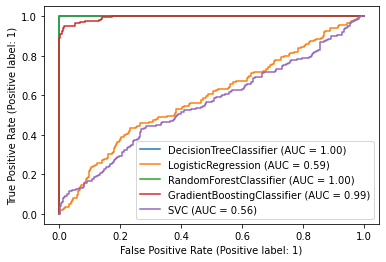

In [131]:
# how well our model perform on training data

disp= plot_roc_curve(DTC, x_train, Y_train)

plot_roc_curve(LR, x_train,Y_train, ax=disp.ax_)   #ax_ means axes with confusion matrix

plot_roc_curve(RF, x_train,Y_train, ax=disp.ax_) 

plot_roc_curve(gbdt_clf, x_train,Y_train, ax=disp.ax_) 

plot_roc_curve(svc, x_train,Y_train, ax=disp.ax_) 

plt.legend(prop={'size' : 10}, loc= 'lower right')

plt.show()


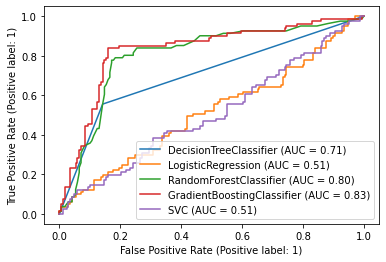

In [132]:
# How well our model works with test data

disp= plot_roc_curve(DTC, x_test, Y_test)

plot_roc_curve(LR, x_test,Y_test, ax=disp.ax_)   #ax_ means axes with confusion matrix

plot_roc_curve(RF, x_test,Y_test, ax=disp.ax_) 

plot_roc_curve(gbdt_clf, x_test,Y_test, ax=disp.ax_) 

plot_roc_curve(svc, x_test,Y_test, ax=disp.ax_) 

plt.legend(prop={'size' : 10}, loc= 'lower right')

plt.show()


We can observe that GradientBoosting Classifier is performing better in our dataset, so let's move ahaed and save this model, But before that let us do hyper parameter tuning for it, which will help us to improve the efficiency of the model.



# Hyper parameter tuning of GradientBoostingClassifier

In [137]:
from sklearn.model_selection import GridSearchCV
# creating parameter list to pass in GridSearch
grid_param={ 'max_depth': range(4,10),
           'min_samples_split': range(1,8),
           'learning_rate':[0.01,0.1, 0.5,1.0],
           'loss' : ['log_loss', 'deviance', 'exponential']}

#Preparing the model
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=grid_param)

#fit
grid.fit(X_train_ns,y_train_ns)

#for best parameters
grid.best_params_

{'learning_rate': 1.0,
 'loss': 'deviance',
 'max_depth': 7,
 'min_samples_split': 5}

In [138]:
GCV_pred=grid.best_estimator_.predict(X_test)   #predicting using best parameters
accuracy_score(y_test, GCV_pred)   # checking the accuracy

0.812

# Saving the Model 

In [139]:
# Pickeling of file or serialization of a file.

import joblib
joblib.dump(gbdt_clf, "Insurance_claims-Fraud_Detection.pkl")

['Insurance_claims-Fraud_Detection.pkl']